In [17]:
#importing dependencies
import numpy as np
import pylab as plt
import networkx as nx

In [18]:
points_list = [(0,1), (1,5), (5,6),(5,4),(1,2),(2,3),(2,7)]

{0: Text(5.51724,6.06405,'0'),
 1: Text(5.09148,6.01065,'1'),
 2: Text(4.88242,6.5694,'2'),
 3: Text(5.0106,7,'3'),
 4: Text(5.25054,5.03346,'4'),
 5: Text(5.02299,5.41954,'5'),
 6: Text(4.71723,5.09116,'6'),
 7: Text(4.5075,6.81175,'7')}

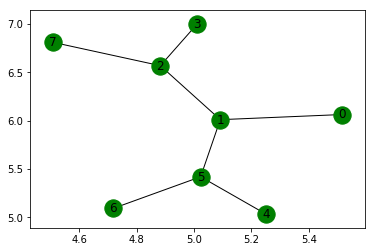

In [19]:
goal = 7
mapping={0:'Start', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7-Destination'}
G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G, k=.5, center=points_list[2])
nx.draw_networkx_nodes(G, pos, node_color= 'g')
nx.draw_networkx_edges(G, pos, node_color= 'b')
nx.draw_networkx_labels(G, pos)

In [20]:
NO_OF_POINTS = 8

In [22]:
R = np.matrix(np.ones(shape = (NO_OF_POINTS, NO_OF_POINTS)))
R *=-1

In [23]:
for point in points_list:
    print(point)
    if point[1] ==goal:
        R[point] = 150
    else:
        R[point] = 0
        
    if point[0] == goal:
        R[point[::-1]] = 150
    else:
        #reverse point
        R[point[::-1]] = 0

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


In [25]:
R[goal, goal] = 150

In [26]:
R

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 150.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 150.]])

In [28]:
Q = np.matrix(np.zeros([NO_OF_POINTS, NO_OF_POINTS]))

#the learning parameter
gamma = 0.8

initial_state = 1

def available_actions(state):
    current_state_row = R[state, ]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state)

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act, 1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,]==np.max(Q[action,]))[1]
    
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    
    max_value = Q[action, max_index]
    
    Q[current_state, action] = R[current_state, action] + gamma *max_value
    print('max_value', R[current_state, action] + gamma *max_value)
    
    if np.max(Q > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)
update(initial_state, action, gamma)

max_value 0.0


0

In [31]:
scores=[]
for i in  range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state, action, gamma)
    scores.append(score)
    print ('Scores :', str(score))
    
print('Trained Q matrix: ')
print (Q/np.max(Q)*100)

#testing
current_state = 0
steps = [current_state]

while current_state != 7:
    next_step_index = np.where(Q[current_state,]== np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

max_value 0.0
Scores : 0
max_value 0.0
Scores : 0
max_value 0.0
Scores : 0
max_value 0.0
Scores : 0
max_value 0.0
Scores : 0
max_value 0.0
Scores : 0
max_value 0.0
Scores : 0
max_value 0.0
Scores : 0
max_value 0.0
Scores : 0
max_value 0.0
Scores : 0
max_value 0.0
Scores : 0
max_value 0.0
Scores : 0
max_value 0.0
Scores : 0
max_value 0.0
Scores : 0
max_value 0.0
Scores : 0
max_value 0.0
Scores : 0
max_value 0.0
Scores : 0
max_value 0.0
Scores : 0
max_value 150.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 270.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 1

Scores : 921.0159385426759
max_value 583.1115013973607
Scores : 921.0159385426759
max_value 583.1115013973607
Scores : 921.0159385426759
max_value 332.4603924480001
Scores : 921.0159385426759
max_value 583.1115013973607
Scores : 921.0159385426759
max_value 332.4603924480001
Scores : 921.0159385426759
max_value 583.1115013973607
Scores : 929.7473236098335
max_value 466.48920111788857
Scores : 936.7324316635597
max_value 466.48920111788857
Scores : 943.717539717286
max_value 373.1913608943109
Scores : 949.3056261602669
max_value 373.1913608943109
Scores : 949.3056261602669
max_value 466.48920111788857
Scores : 949.3056261602669
max_value 583.1115013973607
Scores : 949.3056261602669
max_value 466.48920111788857
Scores : 949.3056261602669
max_value 373.1913608943109
Scores : 954.8937126032479
max_value 583.1115013973607
Scores : 954.8937126032479
max_value 728.8893767467009
Scores : 955.6177807515423
max_value 265.9683139584001
Scores : 955.6177807515423
max_value 373.1913608943109
Scores 

Scores : 982.4830396037364
max_value 383.6957638559453
Scores : 982.4830396037364
max_value 599.6197048199316
Scores : 982.4957241495247
max_value 599.6197048199316
Scores : 982.4957241495247
max_value 383.6957638559453
Scores : 982.4957241495247
max_value 599.6197048199316
Scores : 982.4957241495247
max_value 383.6957638559453
Scores : 982.4957241495247
max_value 383.6957638559453
Scores : 982.4957241495247
max_value 306.9566110847563
Scores : 982.6180923591367
max_value 749.5246310249145
Scores : 982.633948041372
max_value 599.6197048199316
Scores : 982.633948041372
max_value 479.6957638559453
Scores : 982.6440956780027
max_value 383.6957638559453
Scores : 982.6440956780027
max_value 383.6957638559453
Scores : 982.6440956780027
max_value 383.6957638559453
Scores : 982.6440956780027
max_value 599.6197048199316
Scores : 982.6440956780027
max_value 383.6957638559453
Scores : 982.6440956780027
max_value 383.6957638559453
Scores : 982.6440956780027
max_value 599.6197048199316
Scores : 982

Most efficient path:
[0, 1, 2, 7]


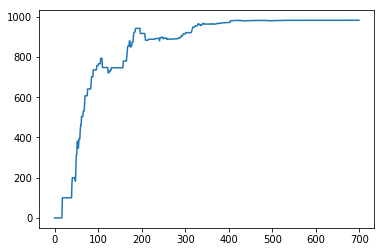

In [33]:
# Most efficient path and Number of iterations taken to calculate the path and 
print('Most efficient path:')
print(steps)

plt.plot(scores)
plt.show()